## Setting

In [1]:
# Library Import

import time
import os

from time import sleep
from datetime import datetime, timedelta

%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np

# import ydata_profiling

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#### merge & data transformtaion

In [2]:
news = pd.read_csv('C:/Users/jjska/Desktop/StockPredictionByTextMining/Dataset/Output/text_analysis_completed_data.csv')
stocks = pd.read_csv('C:/Users/jjska/Desktop/StockPredictionByTextMining/Dataset/Output/stock_analysis_completed_data.csv')

In [3]:
news.head()

,Date,Publisher,Description,News_Count,corpus,Keywords,mcdonald_scores,mcdonald_pos_cnt,mcdonald_neg_cnt,bfs_neg,bfs_neu,bfs_pos,paf_neg,paf_neu,paf_pos,vad_neg,vad_neu,vad_pos,vad_compound
0,2020-01-01,"['Electrek', 'Globes', 'CarBuzz']",Tesla Cybertruck Makes Music Video Debut AllNe...,4,tesla like debut music video supercharger mode...,"['allnew', 'map', 'israel', 'office', 'music',...",1,2,1,0.000000,3.997660,0.000000,0.000000,3.622029,0.000000,0.000000,0.926500,0.073500,0.090300
1,2020-01-02,"['AutoSpies.com', 'DRIVE', 'Trends', 'Exterior...",Tesla may have been on Autopilot in California...,21,uit goldsboro man car des customer stock nye s...,"['aqu', 'duizenden', 'goldsboro', 'coalicin', ...",-5,7,12,0.000000,19.726527,0.772285,2.433325,14.463045,0.654019,0.102095,0.887905,0.010000,-0.130795
2,2020-01-03,"['syracuse.com', 'Fossbytes', 'IndyStar', 'Blo...",Tesla to provide movies online games in its ca...,27,dulle home ble man car gran stock fourth tempe...,"['auburn', 'inde', 'handicap', 'dulle', 'bootl...",-7,8,15,1.994734,21.683010,2.999998,2.090888,16.970401,3.261286,0.020407,0.933519,0.046074,0.054081
3,2020-01-06,"['Automobile', 'AutoWeek', 'Torque', 'Bloomber...",I70 crash one of 3 raising questions about Tes...,45,die bicyclist probe business reim display cutt...,"['blindgngern', 'brandstofmotor', 'doore', 'al...",-13,17,30,0.666535,11.250165,2.432849,0.611766,10.516358,1.132253,0.053672,0.856730,0.071079,0.022152
4,2020-01-07,"['electrive.net', 'Fossbytes', 'Yahoo', 'Indon...",China could be the swing factor for Teslas sto...,27,gigafactora month offiziell har program swing ...,"['fortschritt', 'english', 'expedition', 'bloc...",-3,6,9,1.551042,23.577997,0.999993,0.967349,20.643528,0.547569,0.015778,0.862704,0.047481,0.032322


In [4]:
# 주식 예측에 사용할 최종 데이터
X = stocks.merge(news, on='Date', how='left')
X.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,...,bfs_neg,bfs_neu,bfs_pos,paf_neg,paf_neu,paf_pos,vad_neg,vad_neu,vad_pos,vad_compound
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,...,0.000000,19.726527,0.772285,2.433325,14.463045,0.654019,0.102095,0.887905,0.010000,-0.130795
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,...,1.994734,21.683010,2.999998,2.090888,16.970401,3.261286,0.020407,0.933519,0.046074,0.054081
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,...,0.666535,11.250165,2.432849,0.611766,10.516358,1.132253,0.053672,0.856730,0.071079,0.022152
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,...,1.551042,23.577997,0.999993,0.967349,20.643528,0.547569,0.015778,0.862704,0.047481,0.032322
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,...,0.859929,10.687515,4.987508,0.933394,9.042120,3.245865,0.012059,0.888529,0.099412,0.141247


In [7]:
X['okay'] = np.where(X['Close_ratio']>0, 1, 0)

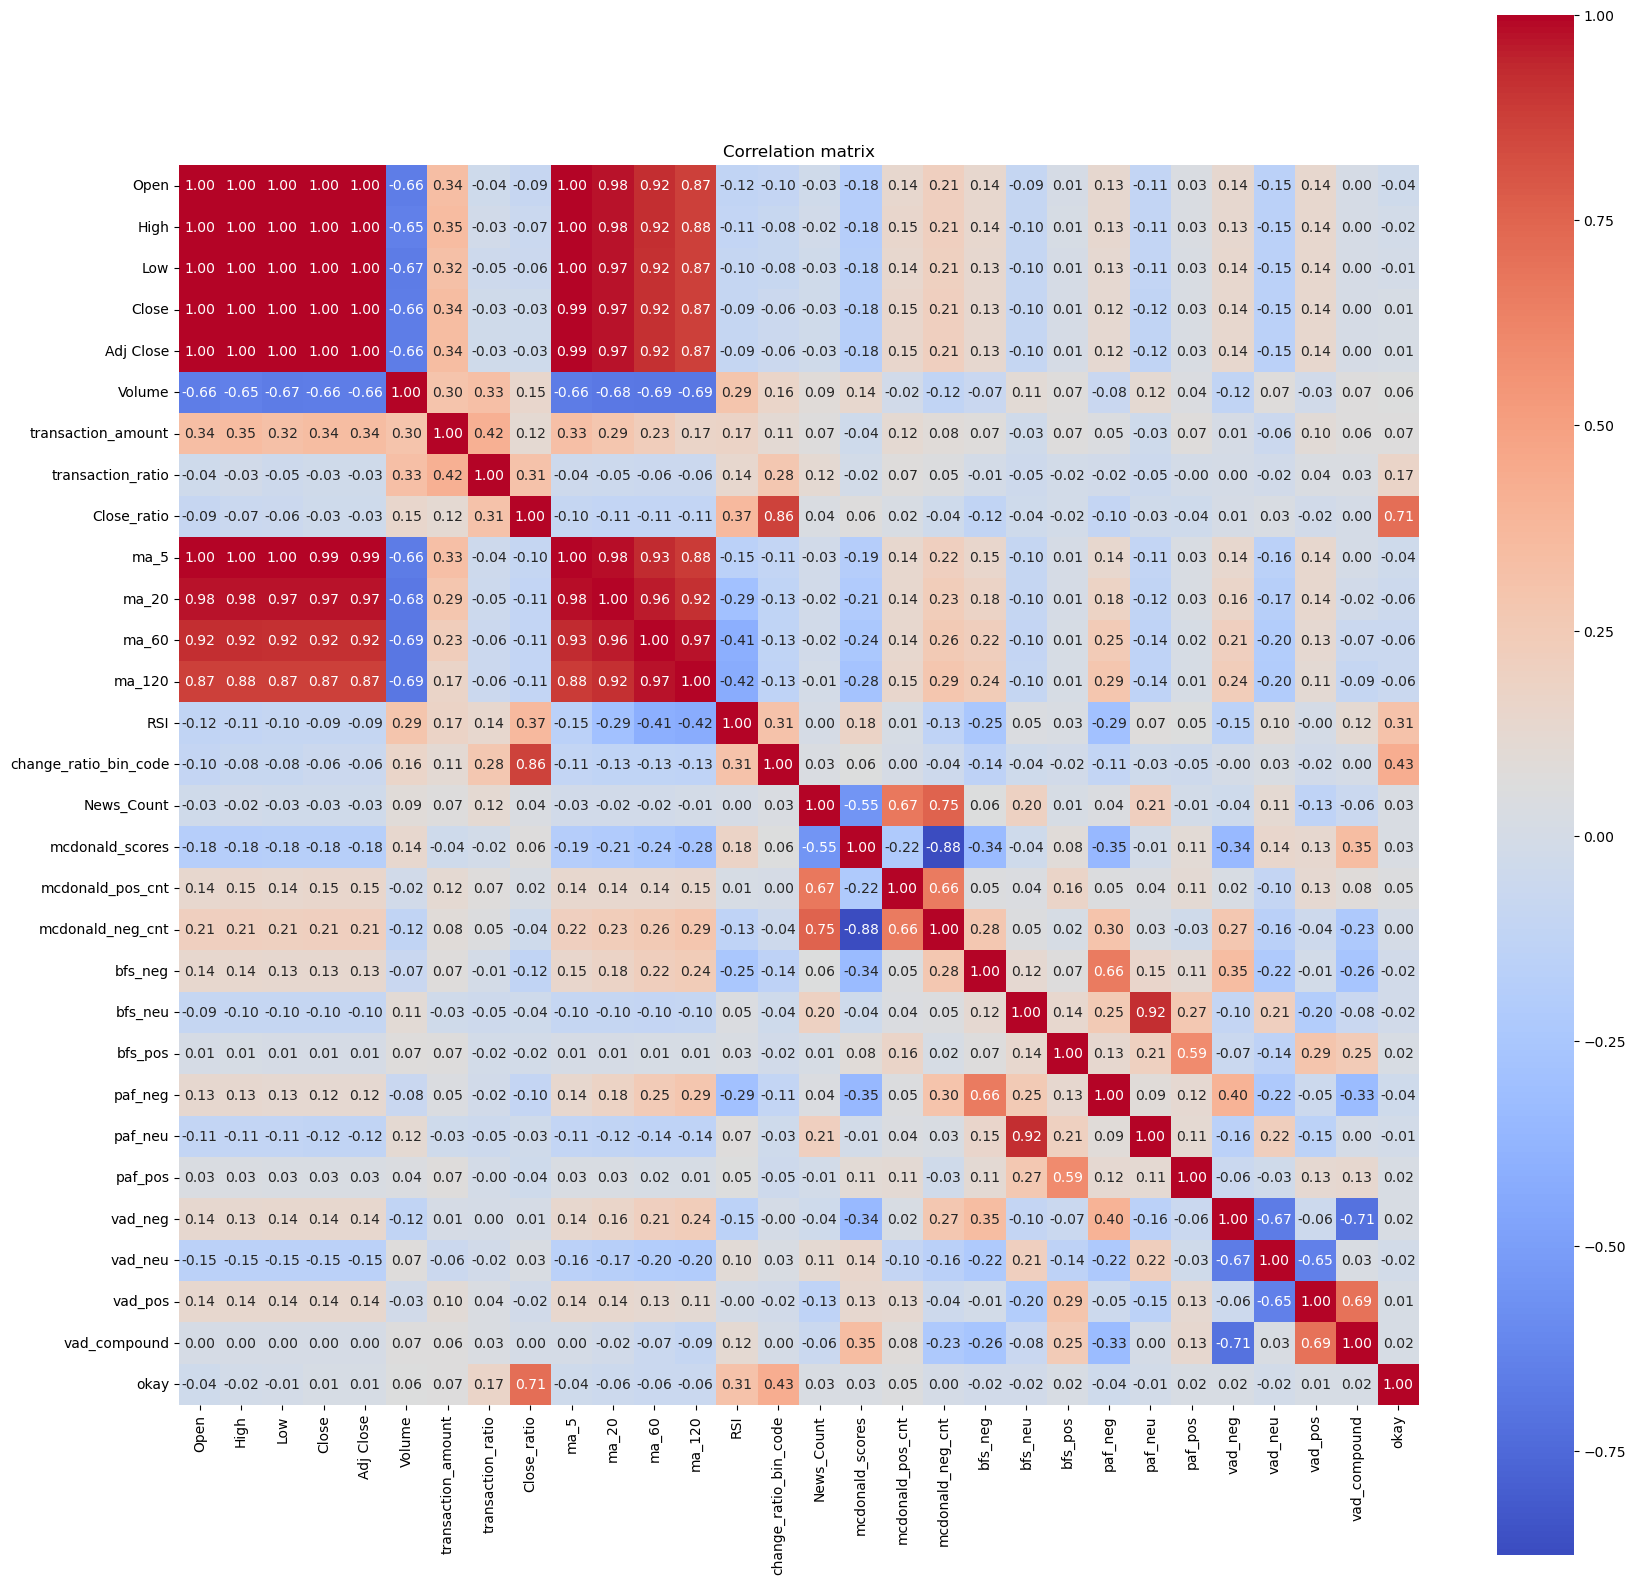

In [8]:
import seaborn as sns

# Calculate correlation matrix
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

#### 추가한 감성 분석의 결과를 예측에 용이하게 변형하는 과정

In [4]:
selected_columns = ['Date', 'News_Count', 'Description_Sentiment_Score',  'Keywords_Sentiment_Score', 'finbert_score', 'ProusAI/finbert_score']
selected_news = news[selected_columns]
selected_news.shape

(783, 6)

In [5]:
# 분석에 사용할 news 데이터
selected_news.head()

,Date,News_Count,Description_Sentiment_Score,Keywords_Sentiment_Score,finbert_score,ProusAI/finbert_score
0,2020-01-01,4,0.3794,0.0000,1.997931,1.594462
1,2020-01-02,21,0.0576,0.0000,1.990072,1.499752
2,2020-01-03,27,0.0282,-0.4826,2.001309,1.723811
3,2020-01-06,45,0.0560,0.0000,1.955487,1.561630
4,2020-01-07,27,0.0614,0.0000,1.933712,1.619998


In [35]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,ma_5,ma_20,ma_60,ma_120,RSI,change_ratio_bin_code
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,28.328133,25.635933,22.293344,18.989550,75.728128,2
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,28.489067,26.002533,22.518856,19.094833,78.628681,2
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,28.771200,26.406433,22.748867,19.205478,80.322872,2
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,29.496000,26.850333,22.998111,19.324478,83.258465,2
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,30.480133,27.359033,23.269500,19.457033,86.182879,2


In [36]:
print(stocks.shape)

(756, 16)


#### 원본 뉴스 데이터에서 시간이 다 8시 미국 기준인거 같음, 주식 데이터도 동일 따라서 가정하에 그 날 뉴스는 그날 영향 받은걸로 결정

#### 뉴스에는 공휴일이 포함되있는거 같음, 시간 관계 상 삭제하고 진행

In [6]:
# 주식 예측에 사용할 최종 데이터
X = stocks.merge(selected_news, on='Date', how='left')
X.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,...,ma_20,ma_60,ma_120,RSI,change_ratio_bin_code,News_Count,Description_Sentiment_Score,Keywords_Sentiment_Score,finbert_score,ProusAI/finbert_score
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,...,25.635933,22.293344,18.989550,75.728128,2,21,0.0576,0.0000,1.990072,1.499752
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,...,26.002533,22.518856,19.094833,78.628681,2,27,0.0282,-0.4826,2.001309,1.723811
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,...,26.406433,22.748867,19.205478,80.322872,2,45,0.0560,0.0000,1.955487,1.561630
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,...,26.850333,22.998111,19.324478,83.258465,2,27,0.0614,0.0000,1.933712,1.619998
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,...,27.359033,23.269500,19.457033,86.182879,2,17,0.2192,-0.4826,2.208917,1.806522


#### 주식 데이터만으로 예측

In [118]:
from sklearn.preprocessing import StandardScaler

temp_df = stocks.copy()

predction_values = temp_df['Close_ratio']

temp_df.drop(columns = ['Close_ratio'], inplace = True)
temp_df.drop(columns = ['Date'], inplace = True)

scaler = StandardScaler()

scaled_df = scaler.fit_transform(temp_df)
scaled_df = pd.DataFrame(scaled_df)

scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'transaction_amount', 'transaction_ratio', 'ma_5', 'ma_20', 
              'ma_60', 'ma_120', 'RSI' ,'change_ratio_bin_code']

scaled_df.columns = scale_cols
scaled_df['values'] = predction_values
scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,ma_5,ma_20,ma_60,ma_120,RSI,change_ratio_bin_code,values
0,-1.857515,-1.864473,-1.848653,-1.854838,-1.854838,0.111119,-1.538453,-0.271577,-1.855874,-1.865204,-1.825245,-1.718514,1.503342,-0.052456,2.851818
1,-1.846402,-1.848620,-1.837824,-1.845964,-1.845964,1.347258,-1.193158,2.259813,-1.854194,-1.861391,-1.822938,-1.717467,1.706583,-0.052456,2.963326
2,-1.846423,-1.850281,-1.835631,-1.840028,-1.840028,0.201194,-1.495078,-1.245763,-1.851249,-1.857191,-1.820585,-1.716366,1.825295,-0.052456,1.925464
3,-1.831886,-1.836626,-1.826120,-1.827835,-1.827835,1.362788,-1.146349,2.031657,-1.843683,-1.852575,-1.818035,-1.715182,2.030991,-0.052456,3.880052
4,-1.823343,-1.818351,-1.815533,-1.811773,-1.811773,3.350797,-0.511556,2.016300,-1.833411,-1.847284,-1.815259,-1.713864,2.235903,-0.052456,4.920483


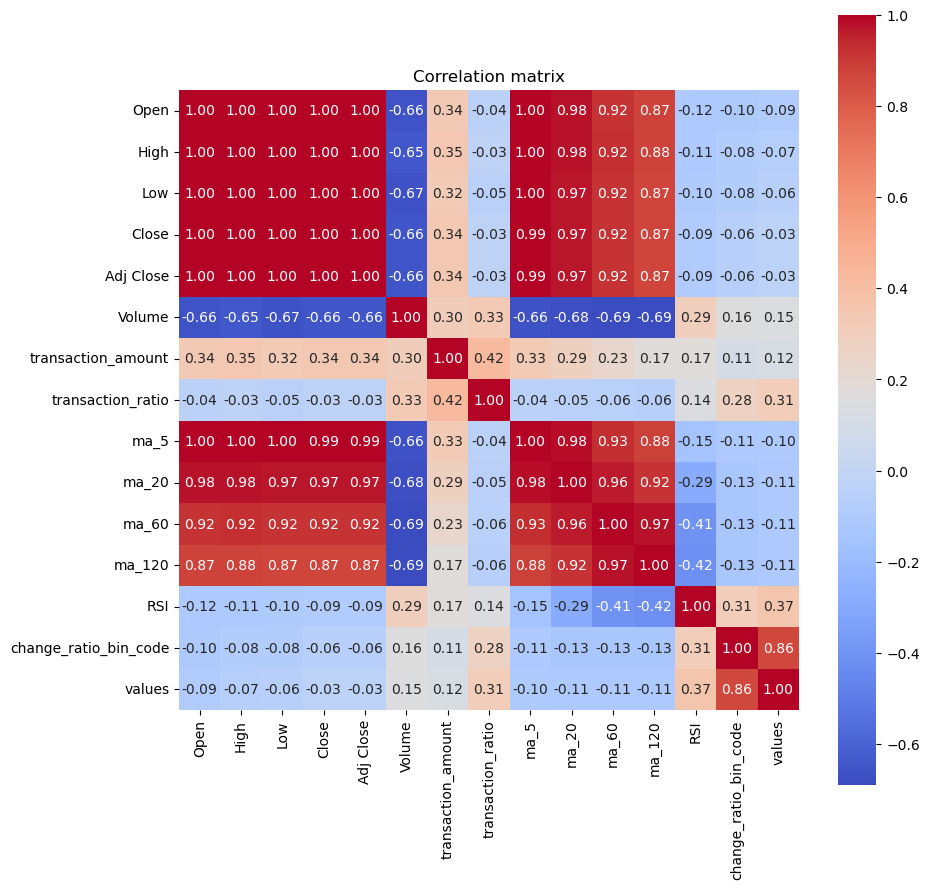

In [119]:
import seaborn as sns

# Calculate correlation matrix
corr = scaled_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

In [120]:
# 데이터 분할 및 독립 변수 & 종속 변수 설정
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


TEST_SIZE = 200 # TEST_SIZE 개수만큼의 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 나눔
WINDOW_SIZE = 10

train = scaled_df[:-TEST_SIZE] #0~556
test = scaled_df[-TEST_SIZE:] #556~


feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'transaction_amount', 'transaction_ratio', 'ma_5', 'ma_20', 
              'ma_60', 'ma_120', 'RSI', 'change_ratio_bin_code']
label_cols = ['values']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)

Epoch 1/300
14/14 [==============================] - 5s 86ms/step - loss: 21.3525 - val_loss: 24.9365
Epoch 2/300
14/14 [==============================] - 0s 19ms/step - loss: 21.0885 - val_loss: 24.9750
Epoch 3/300
14/14 [==============================] - 0s 20ms/step - loss: 21.0782 - val_loss: 25.2031
Epoch 4/300
14/14 [==============================] - 0s 19ms/step - loss: 20.9739 - val_loss: 25.1929
Epoch 5/300
14/14 [==============================] - 0s 20ms/step - loss: 20.8714 - val_loss: 25.1140
Epoch 6/300
14/14 [==============================] - 0s 21ms/step - loss: 20.9622 - val_loss: 25.3672
Epoch 7/300
14/14 [==============================] - 0s 19ms/step - loss: 21.0465 - val_loss: 24.7069
Epoch 8/300
14/14 [==============================] - 0s 19ms/step - loss: 20.8199 - val_loss: 25.2083
Epoch 9/300
14/14 [==============================] - 0s 21ms/step - loss: 20.8625 - val_loss: 25.4615
Epoch 10/300
14/14 [==============================] - 0s 20ms/step - loss: 20.7176

14/14 [==============================] - 0s 20ms/step - loss: 10.9481 - val_loss: 38.4268
Epoch 160/300
14/14 [==============================] - 0s 22ms/step - loss: 10.6937 - val_loss: 37.4889
Epoch 161/300
14/14 [==============================] - 0s 20ms/step - loss: 10.8857 - val_loss: 35.8023
Epoch 162/300
14/14 [==============================] - 0s 20ms/step - loss: 10.8618 - val_loss: 33.1617
Epoch 163/300
14/14 [==============================] - 0s 20ms/step - loss: 10.9764 - val_loss: 38.8216
Epoch 164/300
14/14 [==============================] - 0s 20ms/step - loss: 11.0905 - val_loss: 37.7053
Epoch 165/300
14/14 [==============================] - 0s 19ms/step - loss: 11.4848 - val_loss: 36.7051
Epoch 166/300
14/14 [==============================] - 0s 20ms/step - loss: 10.5643 - val_loss: 35.9381
Epoch 167/300
14/14 [==============================] - 0s 25ms/step - loss: 10.4685 - val_loss: 36.2696
Epoch 168/300
14/14 [==============================] - 0s 21ms/step - loss: 10

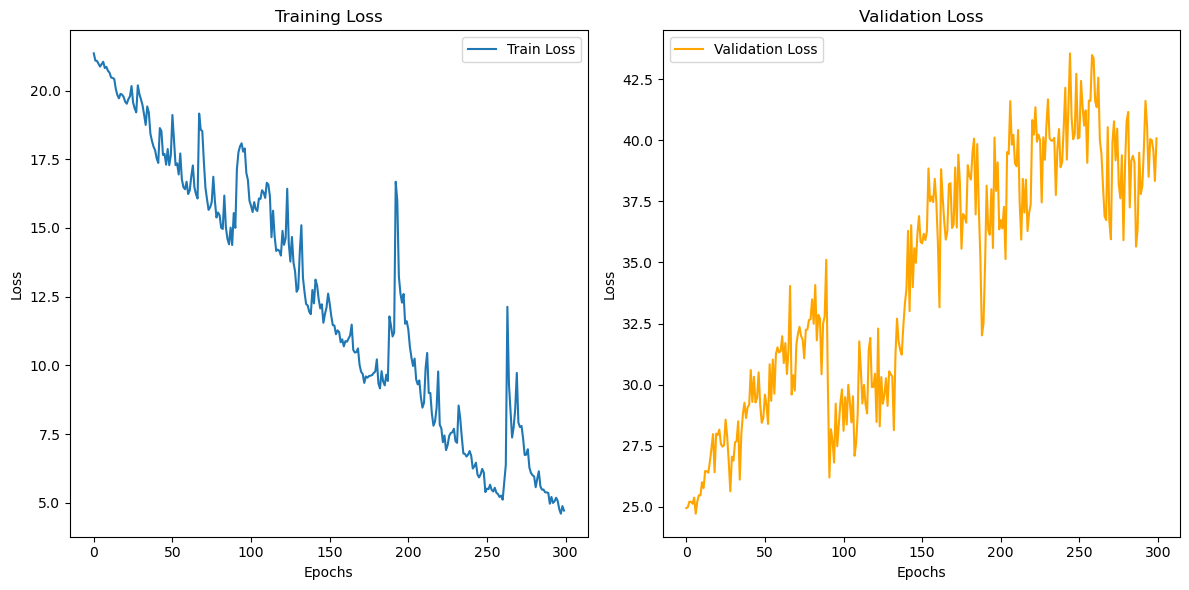

In [121]:
# LSTM 모델 구축 - 주식 데이터만을 활용해서
from keras.utils import to_categorical

model = Sequential()

model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2)) # Dropout layer 추가
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2)) # Dropout layer 추가
model.add(LSTM(units=16))

model.add(Dense(units=1, activation='linear')) # 출력 뉴런의 수를 1개로 설정, 활성화 함수를 linear로 변경

model.compile(optimizer='adam', loss='mean_squared_error') # 손실 함수를 mean_squared_error로 변경

early_stopping = EarlyStopping(monitor='val_loss', patience=30) 

history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_data=(x_valid, y_valid)) 

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### 주식 데이터 활용 시 평가 지표

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_valid = mean_squared_error(y_valid, y_valid_pred)

rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Number of features (excluding the target variable)
p = x_train.shape[2]

# Number of samples
n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

# Calculate adjusted R2
adj_r2_train = adjusted_r2(r2_train, n_train, p)
adj_r2_valid = adjusted_r2(r2_valid, n_valid, p)

# Print metrics
print(f'Train MSE: {mse_train:.4f}, Valid MSE: {mse_valid:.4f}')
print(f'Train RMSE: {rmse_train:.4f}, Valid RMSE: {rmse_valid:.4f}')
print(f'Train MAE: {mae_train:.4f}, Valid MAE: {mae_valid:.4f}')
print(f'Train R2: {r2_train:.4f}, Valid R2: {r2_valid:.4f}')
print(f'Train Adjusted R2: {adj_r2_train:.4f}, Valid Adjusted R2: {adj_r2_valid:.4f}')

4/4 [==============================] - 0s 7ms/step
Train MSE: 3.8323, Valid MSE: 40.0876
Train RMSE: 1.9576, Valid RMSE: 6.3315
Train MAE: 1.3497, Valid MAE: 4.3877
Train R2: 0.8190, Valid R2: -0.5828
Train Adjusted R2: 0.8128, Valid Adjusted R2: -0.8210


In [123]:
# Get loss values
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Calculate average loss
avg_train_loss = sum(train_loss) / len(train_loss)
avg_valid_loss = sum(valid_loss) / len(valid_loss)

print(f'Average Train Loss: {avg_train_loss}, Average Valid Loss: {avg_valid_loss}')

Average Train Loss: 12.52468654791514, Average Valid Loss: 34.24926347732544


#### clasification 문제로 생각하고 진행하였더니, 뉴스 데이터가 합쳐졌을 때 효과를 확인할 수 없어서, 현재 종속 변수가 0~4 값을 가지기 때문
#### 일단 회귀 문제로 인식하고 진행해서 뉴스 데이터의 효과를 확인해보고자 했습니다.

#### 일단 값이 너무 안좋게 나와서 다시 close_ratio 변화율로 종속 변수를 변경하고, 회귀 문제로 생각하고 평가 값을 구했습니다

#### 뉴스 데이터 + 주식 데이터를 통해 예측

In [7]:
X.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,...,ma_20,ma_60,ma_120,RSI,change_ratio_bin_code,News_Count,Description_Sentiment_Score,Keywords_Sentiment_Score,finbert_score,ProusAI/finbert_score
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,...,25.635933,22.293344,18.989550,75.728128,2,21,0.0576,0.0000,1.990072,1.499752
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,...,26.002533,22.518856,19.094833,78.628681,2,27,0.0282,-0.4826,2.001309,1.723811
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,...,26.406433,22.748867,19.205478,80.322872,2,45,0.0560,0.0000,1.955487,1.561630
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,...,26.850333,22.998111,19.324478,83.258465,2,27,0.0614,0.0000,1.933712,1.619998
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,...,27.359033,23.269500,19.457033,86.182879,2,17,0.2192,-0.4826,2.208917,1.806522


In [10]:
X['values'] = np.where(X['Close_ratio']>0, 1, 0)

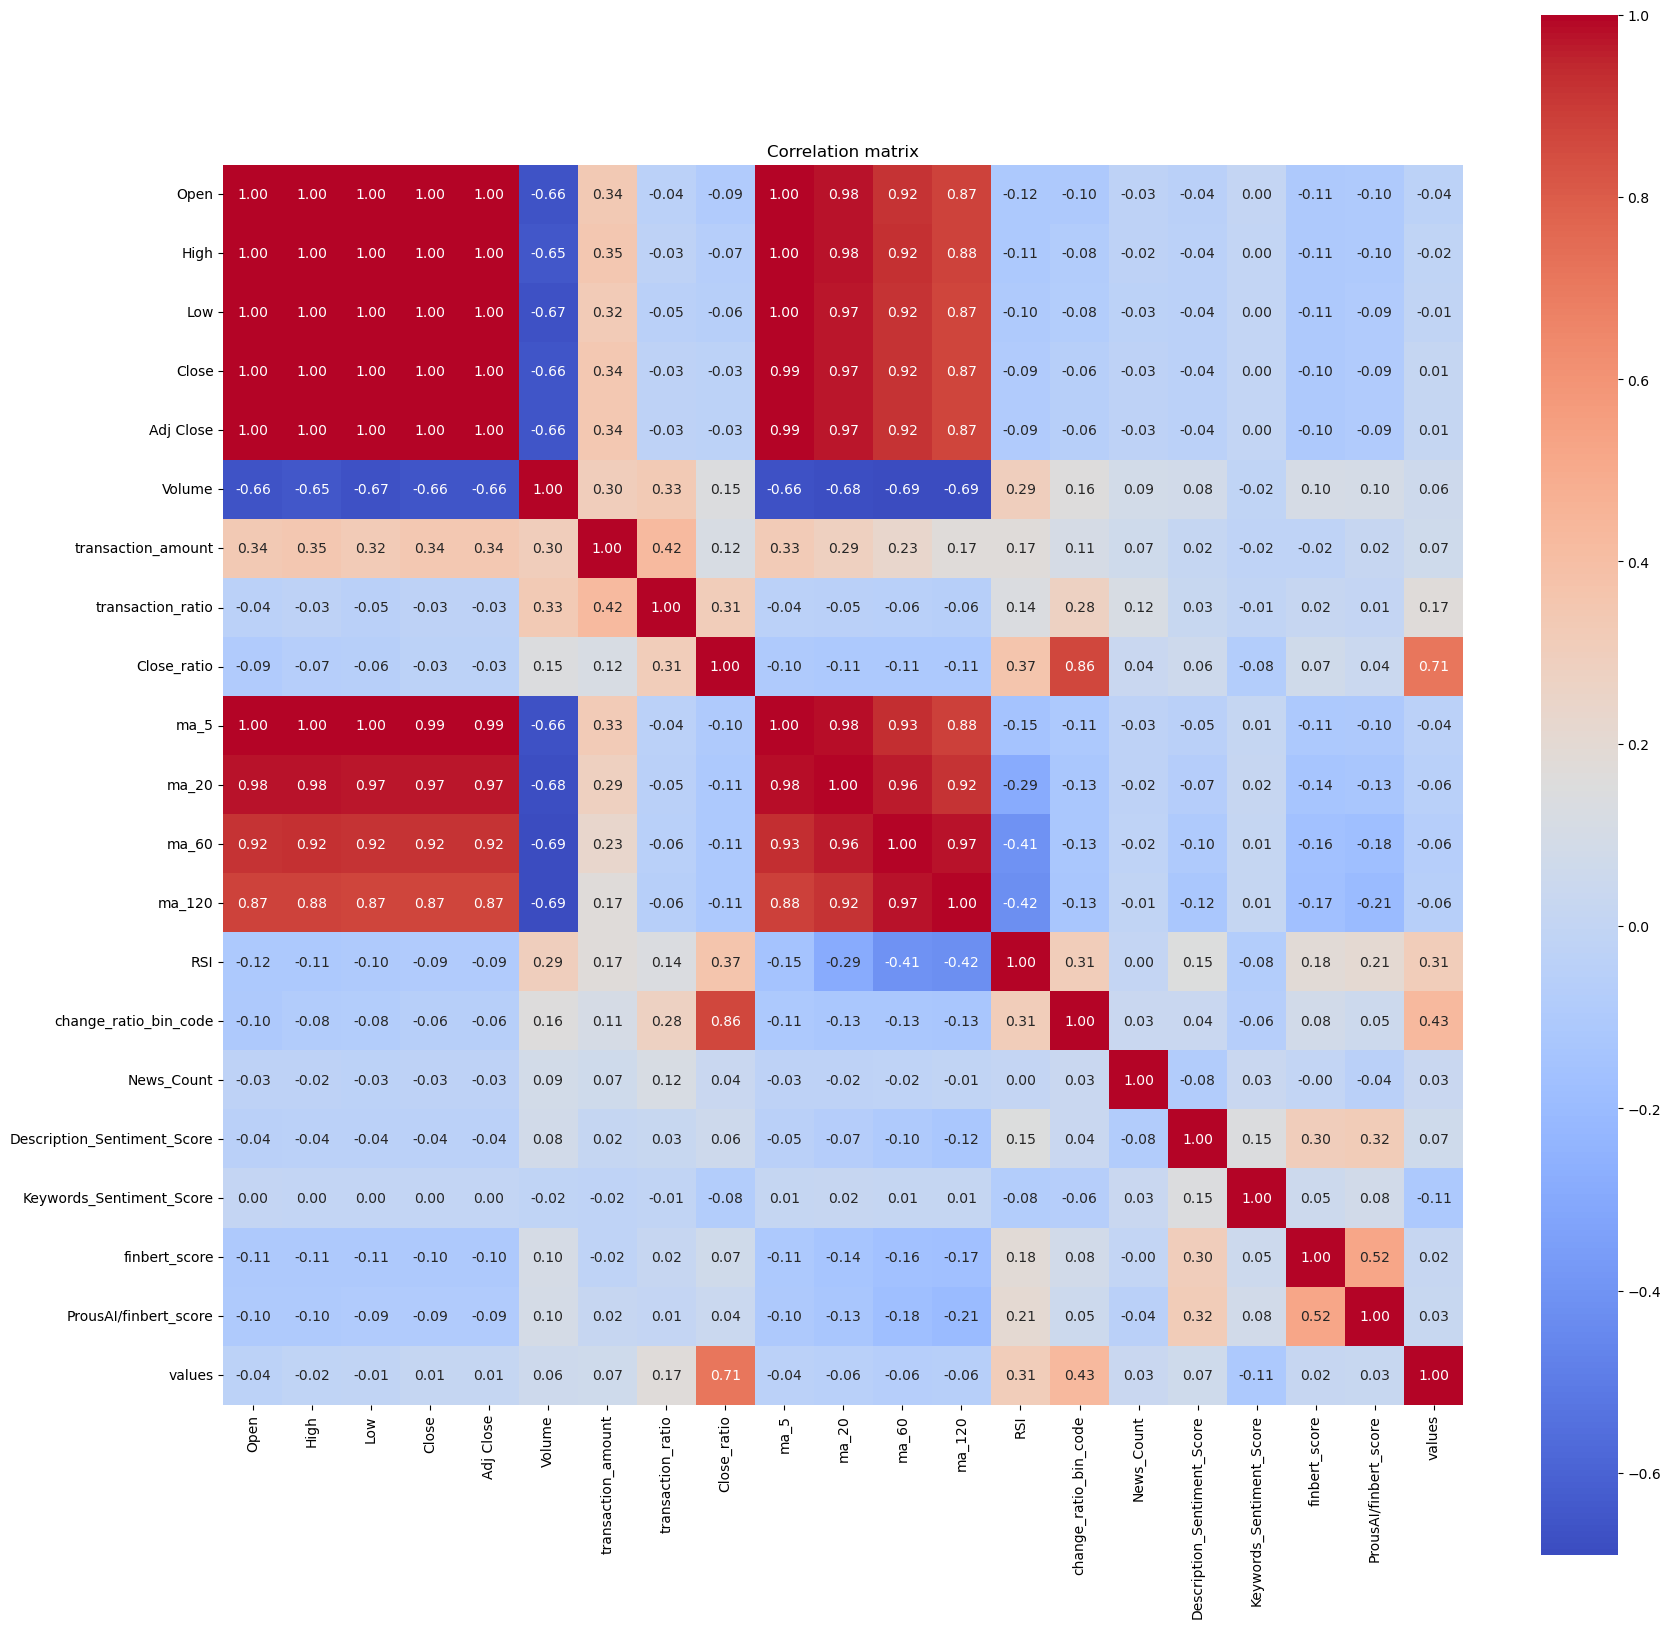

In [11]:
import seaborn as sns
# Calculate correlation matrix
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

In [108]:
temp_df = X.copy()

predction_values = temp_df['Close_ratio']

temp_df.drop(columns = ['Close_ratio'], inplace = True)
temp_df.drop(columns = ['Date'], inplace = True)
temp_df.head()

,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,ma_5,ma_20,...,RSI,change_ratio_bin_code,News_Count,Description_Sentiment_Score,Keywords_Sentiment_Score,Keywords_Positive_Count,Keywords_Negative_Count,Description_Positive_Count,Description_Negative_Count,score
0,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,28.328133,25.635933,...,75.728128,2,21,-0.2381,0,0,0,12,17,0.5
1,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,28.489067,26.002533,...,78.628681,2,27,-0.3333,0,2,2,19,28,0.5
2,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,28.771200,26.406433,...,80.322872,2,45,-0.3556,0,1,1,32,48,0.5
3,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,29.496000,26.850333,...,83.258465,2,27,-0.1111,0,1,1,13,16,0.5
4,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,30.480133,27.359033,...,86.182879,2,17,-0.1765,-1,1,2,14,17,0.5


In [109]:
temp_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'transaction_amount', 'transaction_ratio', 'ma_5', 'ma_20', 'ma_60',
       'ma_120', 'RSI', 'change_ratio_bin_code', 'News_Count',
       'Description_Sentiment_Score', 'Keywords_Sentiment_Score',
       'Keywords_Positive_Count', 'Keywords_Negative_Count',
       'Description_Positive_Count', 'Description_Negative_Count', 'score'],
      dtype='object')

In [110]:
temp_df = X.copy()

predction_values = temp_df['Close_ratio']

temp_df.drop(columns = ['Close_ratio'], inplace = True)
temp_df.drop(columns = ['Date'], inplace = True)

scaler = StandardScaler()

scaled_df = scaler.fit_transform(temp_df)
scaled_df = pd.DataFrame(scaled_df)

scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'transaction_amount', 'transaction_ratio', 'ma_5', 'ma_20', 'ma_60',
       'ma_120', 'RSI', 'change_ratio_bin_code', 'News_Count',
       'Description_Sentiment_Score', 'Keywords_Sentiment_Score',
       'Keywords_Positive_Count', 'Keywords_Negative_Count',
       'Description_Positive_Count', 'Description_Negative_Count', 'score']

scaled_df.columns = scale_cols
scaled_df['vales'] = predction_values
scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,ma_5,ma_20,...,change_ratio_bin_code,News_Count,Description_Sentiment_Score,Keywords_Sentiment_Score,Keywords_Positive_Count,Keywords_Negative_Count,Description_Positive_Count,Description_Negative_Count,score,vales
0,-1.857515,-1.864473,-1.848653,-1.854838,-1.854838,0.111119,-1.538453,-0.271577,-1.855874,-1.865204,...,-0.052456,-0.175980,0.800987,0.537689,-0.873395,-1.142453,-0.137006,-0.546457,0.104821,2.851818
1,-1.846402,-1.848620,-1.837824,-1.845964,-1.845964,1.347258,-1.193158,2.259813,-1.854194,-1.861391,...,-0.052456,0.484273,0.431409,0.537689,1.843833,0.791913,0.941917,0.463844,0.104821,2.963326
2,-1.846423,-1.850281,-1.835631,-1.840028,-1.840028,0.201194,-1.495078,-1.245763,-1.851249,-1.857191,...,-0.052456,2.465030,0.344838,0.537689,0.485219,-0.175270,2.945632,2.300756,0.104821,1.925464
3,-1.831886,-1.836626,-1.826120,-1.827835,-1.827835,1.362788,-1.146349,2.031657,-1.843683,-1.852575,...,-0.052456,0.484273,1.294016,0.537689,0.485219,-0.175270,0.017126,-0.638302,0.104821,3.880052
4,-1.823343,-1.818351,-1.815533,-1.811773,-1.811773,3.350797,-0.511556,2.016300,-1.833411,-1.847284,...,-0.052456,-0.616148,1.040125,-0.461065,0.485219,0.791913,0.171258,-0.546457,0.104821,4.920483


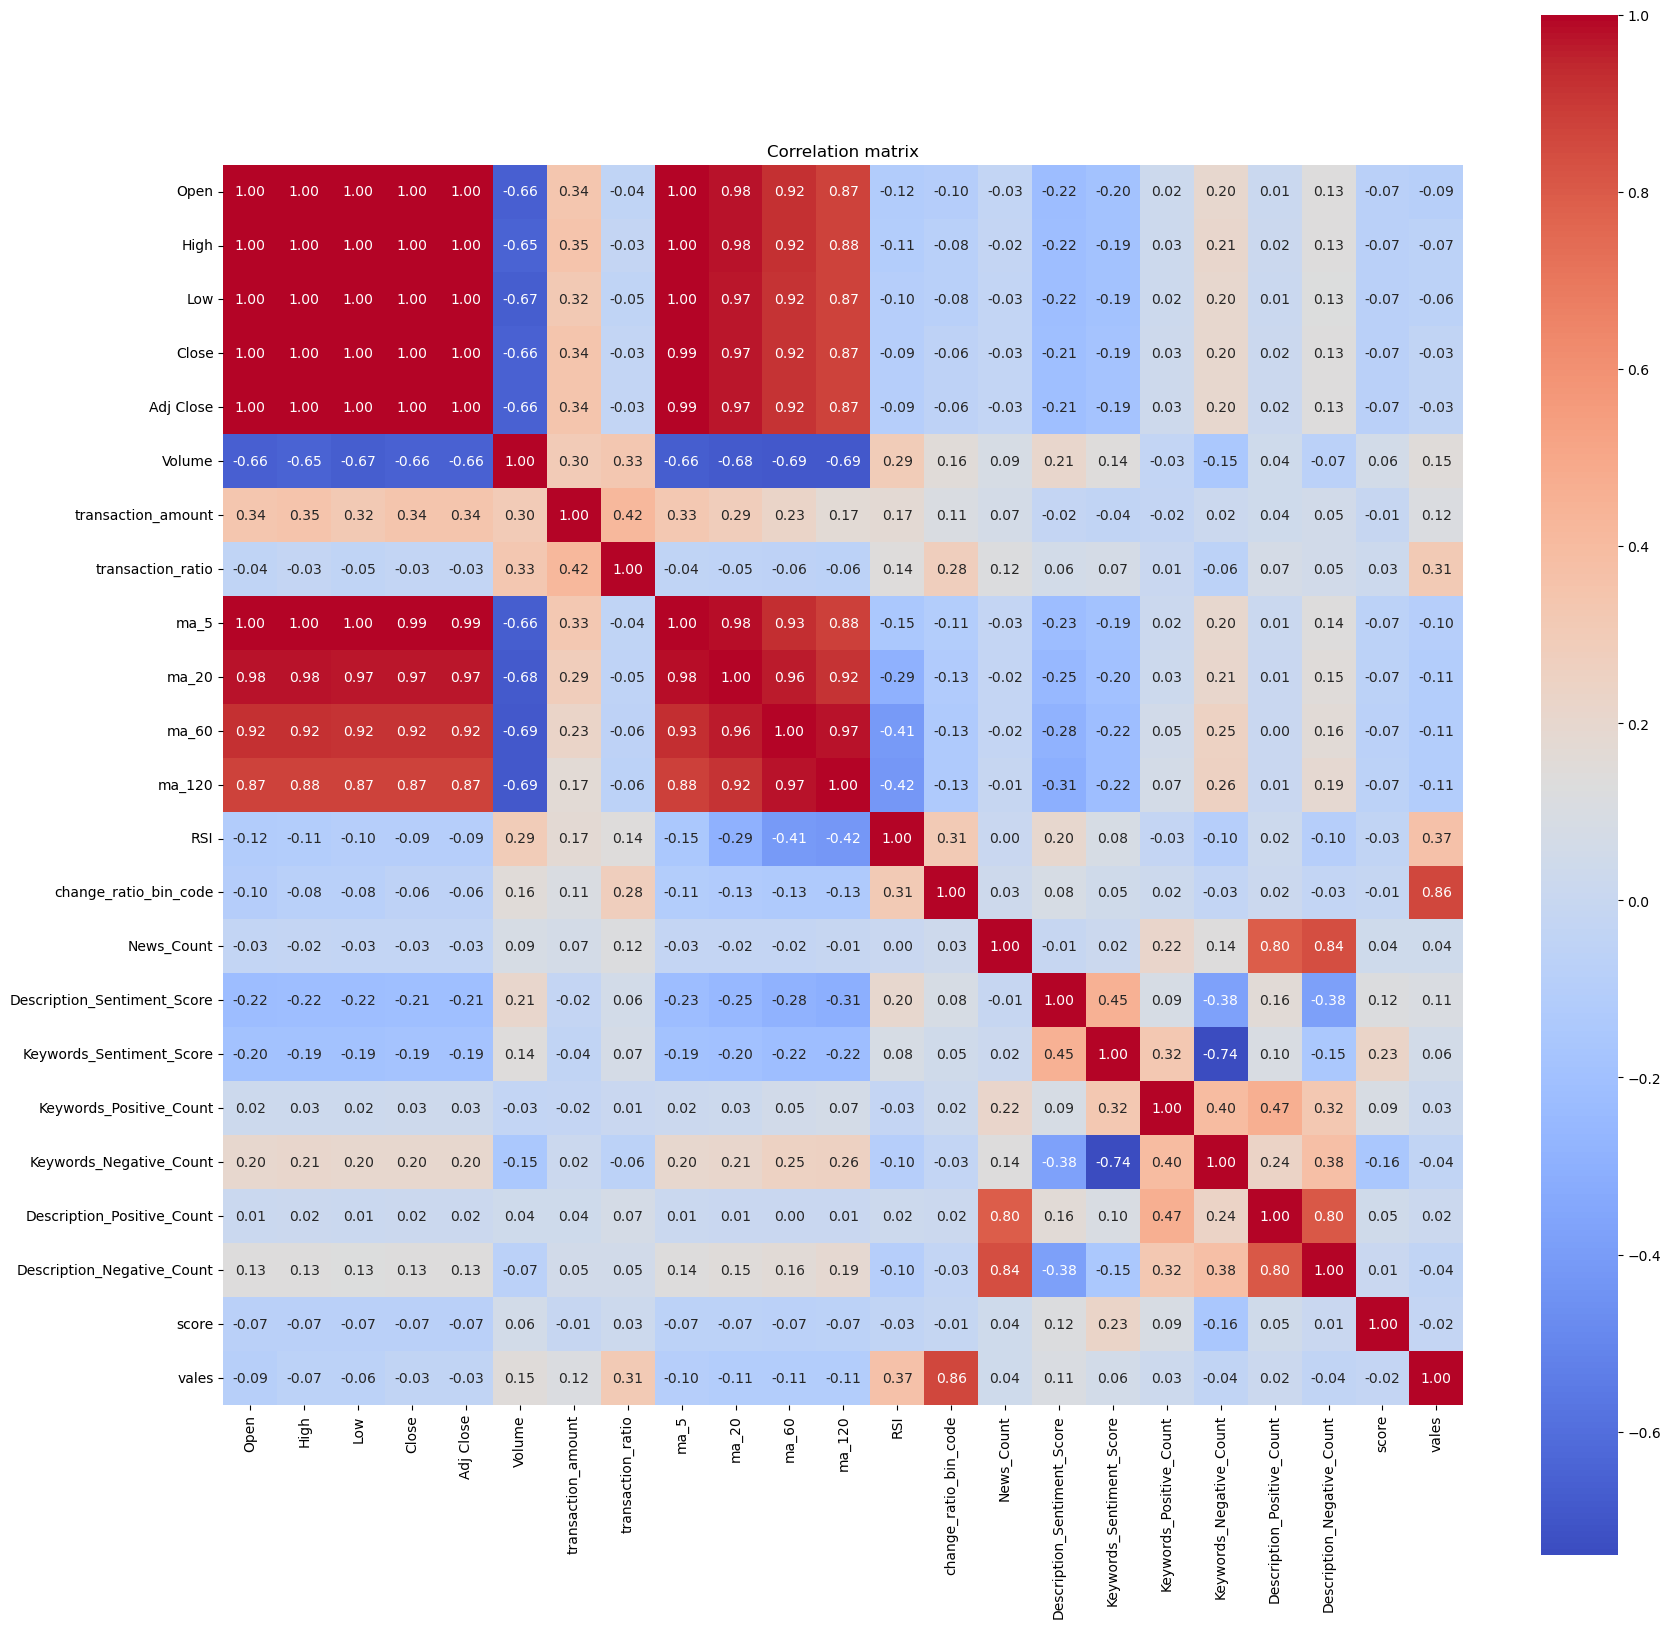

In [111]:
# Calculate correlation matrix
corr = scaled_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

In [112]:
TEST_SIZE = 200 # TEST_SIZE 개수만큼의 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 나눔
WINDOW_SIZE = 10

train = scaled_df[:-TEST_SIZE] #0~556
test = scaled_df[-TEST_SIZE:] #556~


feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'transaction_amount', 'transaction_ratio', 'ma_5', 'ma_20', 'ma_60',
       'ma_120', 'RSI', 'change_ratio_bin_code', 'News_Count',
       'Description_Sentiment_Score', 'Keywords_Sentiment_Score',
       'Keywords_Positive_Count', 'Keywords_Negative_Count',
       'Description_Positive_Count', 'Description_Negative_Count', 'score']
label_cols = ['vales']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)

Epoch 1/300
14/14 [==============================] - 5s 130ms/step - loss: 23.5111 - val_loss: 16.4094
Epoch 2/300
14/14 [==============================] - 0s 21ms/step - loss: 23.2469 - val_loss: 16.4454
Epoch 3/300
14/14 [==============================] - 0s 21ms/step - loss: 23.2433 - val_loss: 16.4330
Epoch 4/300
14/14 [==============================] - 0s 21ms/step - loss: 23.1914 - val_loss: 16.4358
Epoch 5/300
14/14 [==============================] - 0s 26ms/step - loss: 23.0852 - val_loss: 16.4874
Epoch 6/300
14/14 [==============================] - 0s 19ms/step - loss: 22.9835 - val_loss: 16.6940
Epoch 7/300
14/14 [==============================] - 0s 17ms/step - loss: 22.8276 - val_loss: 16.7241
Epoch 8/300
14/14 [==============================] - 0s 18ms/step - loss: 22.8384 - val_loss: 16.9354
Epoch 9/300
14/14 [==============================] - 0s 18ms/step - loss: 22.7201 - val_loss: 17.0633
Epoch 10/300
14/14 [==============================] - 0s 18ms/step - loss: 23.177

14/14 [==============================] - 0s 19ms/step - loss: 4.7996 - val_loss: 24.8567
Epoch 160/300
14/14 [==============================] - 0s 19ms/step - loss: 4.3804 - val_loss: 28.2098
Epoch 161/300
14/14 [==============================] - 0s 22ms/step - loss: 4.6452 - val_loss: 27.2405
Epoch 162/300
14/14 [==============================] - 0s 21ms/step - loss: 4.2781 - val_loss: 28.0437
Epoch 163/300
14/14 [==============================] - 0s 19ms/step - loss: 3.9185 - val_loss: 27.9335
Epoch 164/300
14/14 [==============================] - 0s 19ms/step - loss: 3.8163 - val_loss: 27.0218
Epoch 165/300
14/14 [==============================] - 0s 21ms/step - loss: 3.6674 - val_loss: 27.3345
Epoch 166/300
14/14 [==============================] - 0s 20ms/step - loss: 3.7014 - val_loss: 28.4257
Epoch 167/300
14/14 [==============================] - 0s 19ms/step - loss: 3.6502 - val_loss: 27.5072
Epoch 168/300
14/14 [==============================] - 0s 20ms/step - loss: 3.9020 - va

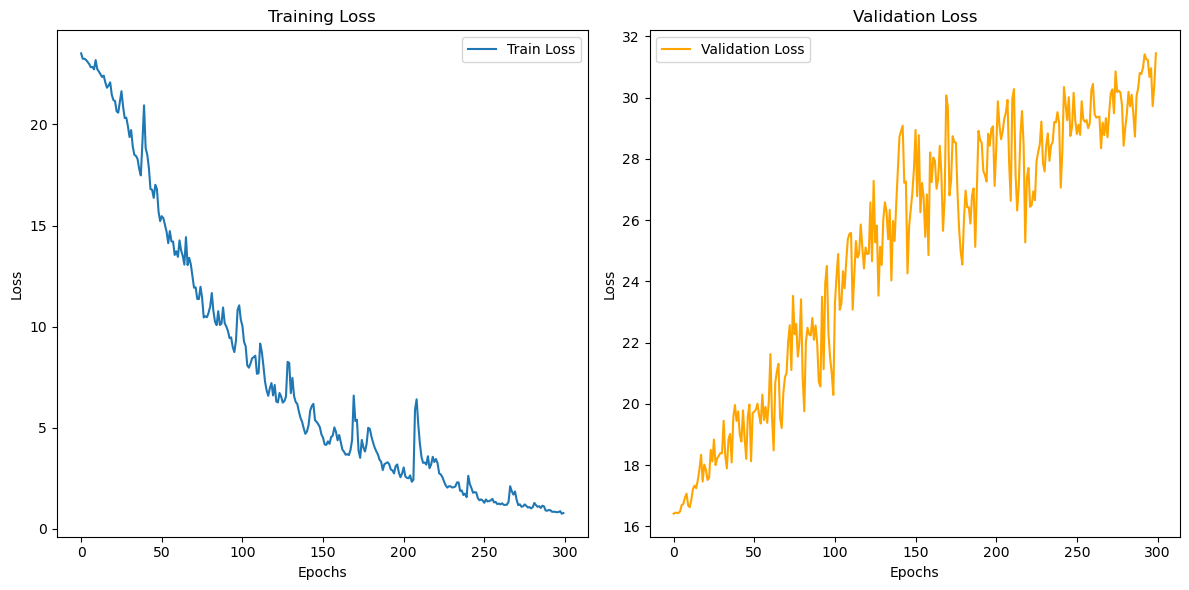

In [113]:
model = Sequential()

model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2)) # Dropout layer 추가
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2)) # Dropout layer 추가
model.add(LSTM(units=16))

model.add(Dense(units=1, activation='linear')) # 출력 뉴런의 수를 1개로 설정, 활성화 함수를 linear로 변경

model.compile(optimizer='adam', loss='mean_squared_error') # 손실 함수를 mean_squared_error로 변경

early_stopping = EarlyStopping(monitor='val_loss', patience=30) 

history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_data=(x_valid, y_valid)) 

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### 주식 + 뉴스 데이터의 평가 지표

In [115]:
# Get predictions
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_valid = mean_squared_error(y_valid, y_valid_pred)

rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Number of features (excluding the target variable)
p = x_train.shape[2]

# Number of samples
n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

# Calculate adjusted R2
adj_r2_train = adjusted_r2(r2_train, n_train, p)
adj_r2_valid = adjusted_r2(r2_valid, n_valid, p)

# Print metrics
print(f'Train MSE: {mse_train:.4f}, Valid MSE: {mse_valid:.4f}')
print(f'Train RMSE: {rmse_train:.4f}, Valid RMSE: {rmse_valid:.4f}')
print(f'Train MAE: {mae_train:.4f}, Valid MAE: {mae_valid:.4f}')
print(f'Train R2: {r2_train:.4f}, Valid R2: {r2_valid:.4f}')
print(f'Train Adjusted R2: {adj_r2_train:.4f}, Valid Adjusted R2: {adj_r2_valid:.4f}')

4/4 [==============================] - 0s 5ms/step
Train MSE: 0.4464, Valid MSE: 31.4470
Train RMSE: 0.6681, Valid RMSE: 5.6078
Train MAE: 0.4258, Valid MAE: 4.4158
Train R2: 0.9809, Valid R2: -0.9308
Train Adjusted R2: 0.9799, Valid Adjusted R2: -1.4305


In [116]:
# Get loss values
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Calculate average loss
avg_train_loss = sum(train_loss) / len(train_loss)
avg_valid_loss = sum(valid_loss) / len(valid_loss)

print(f'Average Train Loss: {avg_train_loss}, Average Valid Loss: {avg_valid_loss}')

Average Train Loss: 7.8229582418998085, Average Valid Loss: 25.065494073232014


#### 일단 평가지표를 보시면 값의 성능이 향상됨 것은 어느정도 확인하였습니다, 다만 다중공선성 문제, 차원 축소, 상관 관계 분석등
#### 놓친 부분 들이 많이 존재합니다, 다만 저희의 목적인 효과성은 확인하였습니다, 위의 부분은 발표자료에 첨부해서 디펜스를 하면 될거같습니다...
#### 

#### 부가 자료 - 보충 필요

In [139]:
# setting
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

In [150]:
ori_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'transaction_amount', 'transaction_ratio', 'Close_ratio', 'ma_5',
       'ma_20', 'ma_60', 'ma_120', 'RSI', 'change_ratio_bin_code', 'Publisher',
       'Description', 'News_Count', 'corpus', 'Keywords',
       'Description_Sentiment_Score', 'Keywords_Sentiment_Score',
       'Keywords_Positive_Count', 'Keywords_Negative_Count',
       'Description_Positive_Count', 'Description_Negative_Count', 'score'],
      dtype='object')

In [126]:
ori_df = stocks.merge(news, on='Date', how='left')
ori_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,transaction_amount,transaction_ratio,Close_ratio,...,News_Count,corpus,Keywords,Description_Sentiment_Score,Keywords_Sentiment_Score,Keywords_Positive_Count,Keywords_Negative_Count,Description_Positive_Count,Description_Negative_Count,score
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,4.101281e+09,-0.046838,2.851818,...,21,autopilot california crash kill stop cybertruc...,"['aqu', 'coalicin', 'autovas', 'complacent', '...",-0.2381,0,0,0,12,17,0.5
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,7.876053e+09,0.920388,2.963326,...,27,provide movie online game car unique bootleg c...,"['model', 'bootleg', 'drd', 'aralarda', 'aubur...",-0.3333,0,2,2,19,28,0.5
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,4.575455e+09,-0.419068,1.925464,...,45,crash raise question tesla autopilot tesla cyb...,"['en', 'model', 'producir', 'engine', 'look', ...",-0.3556,0,1,1,32,48,0.5
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,8.387778e+09,0.833212,3.880052,...,27,china swing factor tesla stock model car roll ...,"['sony', 'ocean', 'trade', 'fisker', 'model', ...",-0.1111,0,1,1,13,16,0.5
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.532736e+10,0.827344,4.920483,...,17,queensland communityscale battery project near...,"['historic', 'communityscale', 'arma', 'buickb...",-0.1765,-1,1,2,14,17,0.5


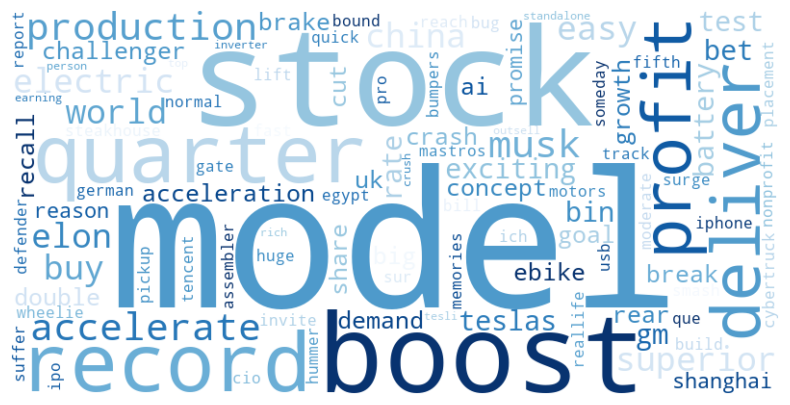

In [149]:
# 감성 분석 점수가 긍정에 가까울 때 주요 키워드
# Filter rows where 'score' is greater than 0.5
filtered_df = ori_df[ori_df['score'] > 0.7]

# Combine all keywords into a single list
all_keywords = [keyword for sublist in filtered_df['Keywords'].tolist() for keyword in eval(sublist)]

# Count the frequency of each keyword and select the top 50
keyword_counts = Counter(all_keywords)
top_50_keywords = dict(keyword_counts.most_common(100))

# Create a word cloud with blue color
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(top_50_keywords)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

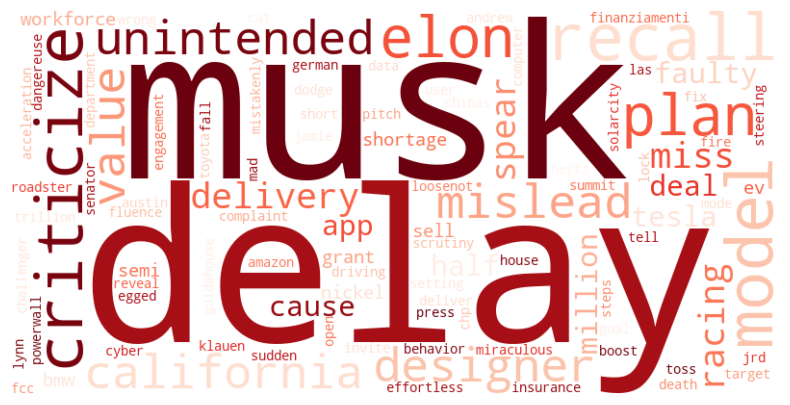

In [148]:
# 감성 분석 점수가 부정에 가까울 때 주요 키워드
# Filter rows where 'score' is greater than 0.5
filtered_df = ori_df[ori_df['score'] < -0.7]

# Combine all keywords into a single list
all_keywords = [keyword for sublist in filtered_df['Keywords'].tolist() for keyword in eval(sublist)]

# Count the frequency of each keyword and select the top 50
keyword_counts = Counter(all_keywords)
top_50_keywords = dict(keyword_counts.most_common(100))

# Create a word cloud with blue color
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(top_50_keywords)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

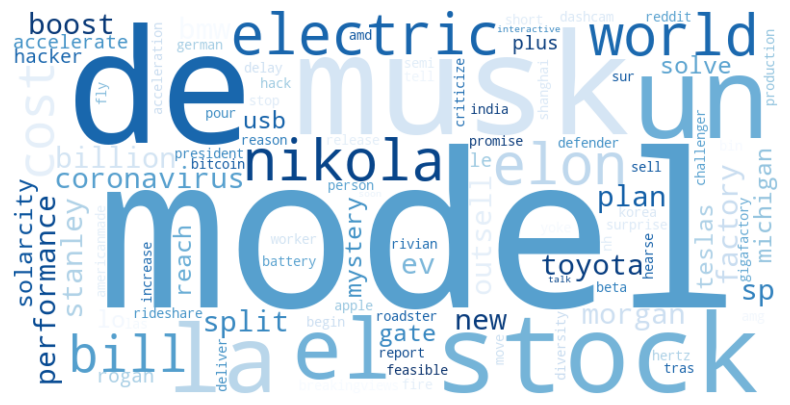

In [154]:
# 주식이 올랐을 때 주요 키워드
# Filter rows where 'change_ratio_bin_code' is 3 or 4
filtered_df_34 = ori_df[ori_df['change_ratio_bin_code'].isin([3, 4])]

# Combine all keywords into a single list
all_keywords_34 = [keyword for sublist in filtered_df_34['Keywords'].tolist() for keyword in eval(sublist)]

# Count the frequency of each keyword and select the top 50
keyword_counts_34 = Counter(all_keywords_34)
top_50_keywords_34 = dict(keyword_counts_34.most_common(100))

# Create a word cloud with blue color
wordcloud_34 = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(top_50_keywords_34)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_34, interpolation='bilinear')
plt.axis('off')
plt.show()

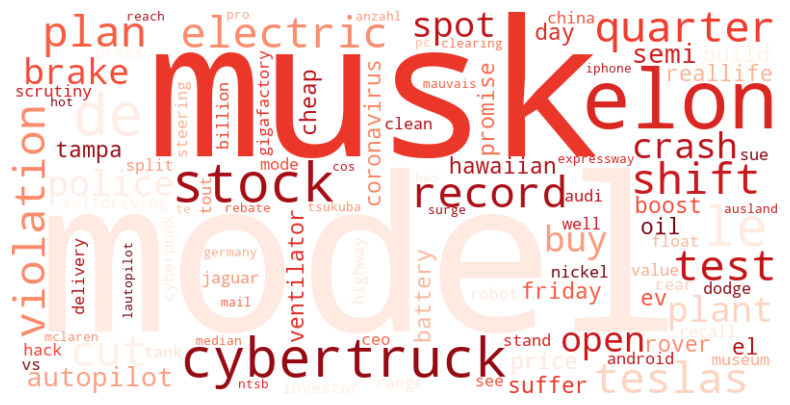

In [157]:
# 주식 하락한 날의 키워드
# Filter rows where 'change_ratio_bin_code' is 0 or 1
filtered_df_01 = ori_df[ori_df['change_ratio_bin_code'].isin([0, 1])]

# Combine all keywords into a single list
all_keywords_01 = [keyword for sublist in filtered_df_01['Keywords'].tolist() for keyword in eval(sublist)]

# Count the frequency of each keyword and select the top 50
keyword_counts_01 = Counter(all_keywords_01)
top_50_keywords_01 = dict(keyword_counts_01.most_common(100))

# Create a word cloud with blue color
wordcloud_01 = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(top_50_keywords_01)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_01, interpolation='bilinear')
plt.axis('off')
plt.show()

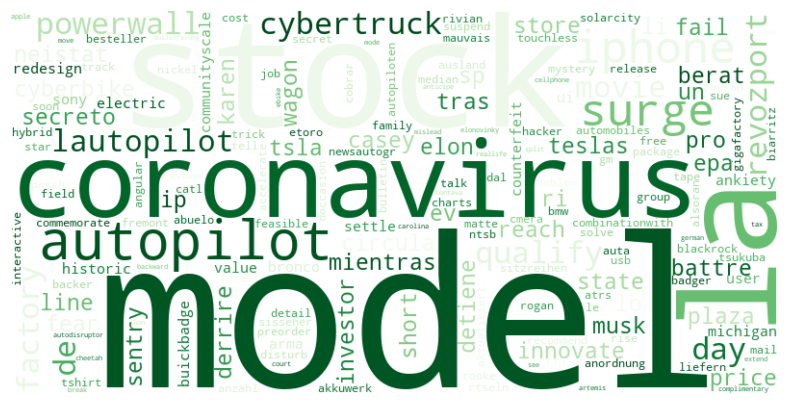

In [160]:
# 거래량이 많이 생긴 날의 키워드
# Select the top 10 rows with the highest 'transaction_ratio'
top_10_df = ori_df.nlargest(30, 'Volume')

# Combine all keywords into a single list
all_keywords_top_10 = [keyword for sublist in top_10_df['Keywords'].tolist() for keyword in eval(sublist)]

# Count the frequency of each keyword
keyword_counts_top_10 = Counter(all_keywords_top_10)

# Create a word cloud with blue color
wordcloud_top_10 = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(keyword_counts_top_10)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top_10, interpolation='bilinear')
plt.axis('off')
plt.show()